<a href="https://colab.research.google.com/github/ouguro3/KDT_Study/blob/main/04_classification_GBM_XGB_LGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GBM (Gradient Boosting Machine)

**부스팅 알고리즘**

여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서  
잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가며 학습하는 방식

부스팅의 대표적인 구현  
`AdaBoost` 와 `Gradient Boost`

### AdaBoost

**adaptive + boosting**

간단한 **약분류기(week classifier)**들이 상호보완 하도록 단계적으로 학습,  
이들을 조합해 최종 강 분류기의 성능을 증폭

약분류기들을 한 번에 하나씩 순차적으로 학습시킬 때,  
먼저 학습된 분류기가 잘못 분류한 결과 정보를 다음 분류기의 학습 시 사용하여  
이전 분류기의 단점을 보완하도록하는 방식  

즉 이전 분류기가 오분류한 샘플의 가중치를 바꾸어가며  
잘못 분류되는 데이터에 더 집중하여 학습 및 분류가 잘되도록 하는것

최종 분류기는 개별 약분류기들에 각각 가중치를 적용 및 조합해 얻을 수 있다

![1](https://user-images.githubusercontent.com/84296244/124744375-a77cf600-df59-11eb-822e-c14a84345330.PNG)

### Gradient Boost

방식 자체는 Adaboost와 비슷하나 가중치 업데이트를 `경사하강법` 을 이용한다  

경사하강법은 반복수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법이다  

오류식 $h(x) = y - F(x)$를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는것

**Gradient Boost 과정**

**1. 최소, 평균값으로 예측**

![1](https://user-images.githubusercontent.com/84296244/124747555-0132ef80-df5d-11eb-8dc1-b7b9c9de23a5.PNG)  

![1](https://user-images.githubusercontent.com/84296244/124747978-828a8200-df5d-11eb-8e72-240d317e6688.PNG)

**2. 예측값과 실제 값의 오차 구하기**

![1](https://user-images.githubusercontent.com/84296244/124748517-2ffd9580-df5e-11eb-9b5a-4903252d1ea7.PNG)

**3. 오차 값을 예측하는 Tree 만들기** 

![1](https://user-images.githubusercontent.com/84296244/124749141-d21d7d80-df5e-11eb-993e-a7e49080a02a.PNG)  



만들어진 Tree

![1](https://user-images.githubusercontent.com/84296244/124749275-fc6f3b00-df5e-11eb-813e-9f7b7a521d16.PNG)  

분류된 값이 여러개가 있는 경우, 평균을내 하나의 값으로 대체한다

![1](https://user-images.githubusercontent.com/84296244/124749491-41936d00-df5f-11eb-825f-5c17567a8d46.PNG)

**4. Learning rate 적용하여, 기존 예측 값 업데이트**  

오차 값을 원래 예측 값에 더해주어 원래 예측 값을 업데이트 시켜주려한다  

다만, 그냥 더해주면 첫번째 행을 기준으로 71.2 + 16.8 = 88 로 원래 Weight 값과 동일하다  

이런 경우,  기존 데이터셋에는 완벽하게 학습되겠지만 새로운 데이터셋에는 잘 맞지 않을 가능성이 높다  

즉, 모델이 과적합된다  

그래서 그대로 더하지 않고 Learning rate 만큼만 더한다  

Learning rate 값은 0.1로 한것으로 한다  

![1](https://user-images.githubusercontent.com/84296244/124750447-6f2ce600-df60-11eb-9770-4c1239e67af0.PNG)

그 후, 업데이트 한 예측 값으로 오차 역시 업데이트 한다  

예를들어, 첫 번째 데이터의 오차는 88 - 72.9 = 15.1이 된다

모든 오차도 업데이트 한 후에 업데이트 된 값으로 다시 새로운 Tree를 만든다  

이 때, 만들어진 Tree의 Leaf Node 도 하나의 값이 되도록 평균으로 대체 해준다  



이렇게 나온 값들을 기반으로 기존 예측 값에 Learning rate 를 적용해 또 다시  
새로운 예측 값으로 업데이트 할 수 있다  

![1](https://user-images.githubusercontent.com/84296244/124751796-021a5000-df62-11eb-8013-3c0e6df33469.PNG)  

식으로 나타내면 다음과 같다  

$71.2 + (0.1 * 16.8) + (0.1 * 15.1) = 74.4$

새로 구한 예측 값은 74.4가 된다  

예측 값은 점점 원래 값 88에 가까워지고 오차는 줄어든다  

### get_human_dataset

 [데이터세트 받을 수 있는 링크](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])
feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [2]:
 def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [3]:
pd.options.display.max_rows = 999
new_feature_name_df = get_new_feature_name_df(feature_name_df)
new_feature_name_df[new_feature_name_df['dup_cnt'] > 0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
321,322,"fBodyAcc-bandsEnergy()-41,48_1",1
322,323,"fBodyAcc-bandsEnergy()-49,56_1",1
323,324,"fBodyAcc-bandsEnergy()-57,64_1",1
324,325,"fBodyAcc-bandsEnergy()-1,16_1",1
325,326,"fBodyAcc-bandsEnergy()-17,32_1",1


In [4]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [5]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


### 사용자 행동 데이터 세트 예측 분류

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 800.0 초 


기본 하이퍼 파라미터로도 정확도가 0.9386 이 나왔다

### GBM 하이퍼 파라미터 튜닝 

`max_depth`, `max_feature` 등의 트리 기반 파라미터는 랜덤 포레스트, 결정 트리등과 동일함으로 생략

- **loss** : 경사 하강법에서 사용할 비용 함수 지정  (기본값 : deviance)

- **leraning_rate** : GBM이 학습을 진행할 때마다 적용하는 학습률,  0 ~ 1 사이 값 지정 (기본값 : 0.1)     
                      
- **n_estimators** : 약한학습기의 개수, 많을수록 예측 성능이 좋아질 수 있으나 시간이 더 오래걸림  (기본값 : 100)

- **subsample** : 약한 학습기가 학습에 사용하는 데이터의 샘플링 비율 (기본값 : 1)  
과적합이 염려되는 경우, 1보다 작은 값으로 설정

In [7]:
# GridSearchCV 로 하이퍼 파라미터 최적화
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 80.0min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도: 0.9013


In [8]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9396


# XGBoost (eXtra Gradient Boost)

### 개요

트리 기반 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나 

압도적인 수치는 아니지만 다른 머신러닝보다 뛰어난 예측 성능을 가진다  

GBM에 기반을 두고 있지만,  GBM의 단점을 해결한 알고리즘이다  

특히, GPU 환경에서 병렬 학습이 가능해 속도가 기존 GBM보다 매우 빠르다

![xgboost_levelwise](https://user-images.githubusercontent.com/84296244/124787979-eb84f080-df83-11eb-95b5-bc545915b972.png)

### XGboost의 장점


- **뛰어난 예측 성능**  

    - 분류와 회귀 영역에서 뛰어난 예측 성능을 보인다

- **GBM 대비 빠른 수행 시간**  

    - GBM은 순차적으로 약한 학습기가 가중치를 증감하는 방법으로 학습하기에 속도가 전반적으로 느리다  
    - xgboost는 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보인다  
(다만 다른 머신러닝 알고리즘보다 빠르다는것은 아니다)  

- **과적합 규제 (Regularization)** 

    - 과적합에 대해 내구성이 강하다  

- **나무 가지치기**  

    - GBM은 일반적으로 분할 시 부정 손실이 발생하면 분할을 더 이상 수행하지 않는다  
    - xgboot는 긍정 이득이 없는 분할을 가지치기해 분할 수를 줄일 수 있다

- **자체 내장 교차 검증**
    - xgboost는 반복 수행 시마다 내부적으로 학습 데이터와 평가 데이터를 교차 검증해  
최적화된 반복 수행 횟수를 가질 수 있다  
    - 평가 값이 최적화 되면 반복을 조기 중단할 수 있는 기능이 있다

- **결손값 자체 처리**  
    - xgboost는 결손값을 자체 처리할 수 있는 기능이 있다


### xgboost 설치

In [ ]:
# colab 사용 시
#!pip install xgboost

# Anaconda 사용 시
# conda install -c anaconda py-xgboost

### XGBoost 하이퍼 파라미터

XGBoost 하이퍼 파라미터를 유형별로 분류하면 다음과 같다

- 일반 파라미터
  - 부스팅을 수행할 때 트리를 사용할지, 선형 모델을 사용할지 등을 고른다

- 부스터 파라미터
  - 트리 최적화, 부스팅, 정규화 등과 관련 파라미터 등을 지칭한다

- 학습 태스크 파라미터
  - 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

대부분의 하이퍼 파라미터는 Booster 파라미터에 속한다

주요 일반 파라미터  
- booster [기본값 = gbtree]
  - 어떤 부스터 구조를 쓸지 결정
  - 의사결정기반모형(gbtree),선형모형(gblinear), dart가 있다

- silent [기본값 = 0]
  - 출력 메시지 여부 결정, 나타내고 싶지않을 경우 1로 설정

- nthread [기본값에서 바꾸지 않는것을 추천]

주요 부스터 파라미터
- eta [기본값 = 0.3, learning_rate]
  - 보통 0.05~0.1 정도로 맞춘다
  - 너무 많은 소숫점으로 튜닝하는것도 쓸모가 없다
  - 사이킷런 래퍼 클래스 이용 시 learning_rate 파라미터로 대체
  - 기본값은 0.1 ,   보통 0.01 ~ 0.2 사이의 값을 선호한다

- num_boost_rounds
  - GBM의 n_estimators 와 동일

- min_child_weight [기본값 = 1]
  - 관측치에 대한 가중치 합의 최소
  - 값이 높을수록 과적합이 방지된다

- gamma [기본값 = 0]
  - 리프노드의 추가분할을 결정할 최소손실 감소값
  - 해당값보다 손실이 크게 감소할 때 분리한다
  - 값이 높을수록 과적합이 방지된다

- max_depth [기본값 = 6]
  - 트리의 maximum depth
  - 적절한 값이 제시되어야 하고 보통 3-10 사이 값이 적용된다
  - max_depth가 높을수록 모델의 복잡도가 커져 과적합 하기 쉽다

- sub_sample [기본값 = 1]
  - 약한 학습기가 학습에 사용하는 데이터 샘플링 비율
  - 보통 0.5 ~ 1 사용된다
  - 값이 낮을수록 과적합이 방지된다

- colsample_bytree [기본값 = 1]
  - 각 tree 별 사용된 feature의 퍼센테이지
  - 보통 0.5 ~ 1 사용된다
  - 값이 낮을수록 과적합이 방지된다

- lambda [기본값 = 1, 별칭 : reg_lambda]
  - 가중치에 대한 L2 Regularization 적용 값
  - 피처 개수가 많을 때 적용을 검토
  - 이 값이 클수록 과적합 감소 효과 

- alpha [기본값 = 0, 별칭 : reg_alpha]
  - 가중치에 대한 L1 Regularization 적용 값
  - 피처 개수가 많을 때 적용을 검토
  - 이 값이 클수록 과적합 감소 효과



학습 태스크 파라미터

- objective [기본값 : reg = squarederror]
  - reg : squarederror
    - 제곱 손실이 있는 회귀
  - binary : logistic (binary-logistic classification)
    - 이항 분류 문제 로지스틱 회귀 모형으로 반환값이 클래스가 아니라 예측 확률
  - multi : softmax
    - 다항 분류 문제의 경우 소프트맥스(Softmax)를 사용해서 분류하는데 반횐되는 값이 예측확률이 아니라 클래스임. 또한 num_class도 지정해야함
  - multi : softprob
    - 각 클래스 범주에 속하는 예측확률을 반환

- eval_metric
  - 모델의 평가 함수를 조정하는 함수
  - 설정한 objective 별로 기본설정값이 지정되어 있다
  - rmse: root mean square error
  - mae: mean absolute error
  - logloss: negative log-likelihood
  - error: Binary classification error rate (0.5 threshold)
  - merror: Multiclass classification error rate
  - mlogloss: Multiclass logloss
  - auc: Area under the curve

**민감하게 조정해야하는 것**

- booster 모양
- eval_metric(평가함수) / objective(목적함수)
- eta
- L1 form (L1 레귤러라이제이션 폼이 L2보다 아웃라이어에 민감)
- L2 form

**과적합 방지를 위해 조정해야하는 것**

- learning rate 낮추기 → n_estimators은 높여야함
- max_depth 낮추기
- min_child_weight 높이기
- gamma 높이기
- subsample, colsample_bytree 낮추기

### Early Stopping

조기 중단 기능  

기존 GBM은 지정된 횟수만큼 반복적으로 학습 오류를 감소시키며 학습을 진행하면서  
중간에 반복을 멈출 수 없고 n_estimator에 지정된 횟수를 다 완료해야 한다  

하지만 xgboot는 조기 중단 기능이 있어 예측 오류가 더 이상 개선되지 않으면 중지한다

## 위스콘신 유방암 예측

In [9]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [10]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [11]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [15]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

DMatrix 는 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost 만의 전용 데이터 세트  

입력 파라미터는 `data` 와 `label` 이다  

data = Feature 데이터 세트

label = label 데이터 세트,  회귀의 경우 숫자형인 종속값 데이터 세트



In [16]:
# xgboot 의 파라미터는 딕셔너리 형식으로
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

In [17]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

[0]	train-logloss:0.609688	eval-logloss:0.61352
[1]	train-logloss:0.540803	eval-logloss:0.547843
[2]	train-logloss:0.483753	eval-logloss:0.494248
[3]	train-logloss:0.434457	eval-logloss:0.447986
[4]	train-logloss:0.39055	eval-logloss:0.409109
[5]	train-logloss:0.354146	eval-logloss:0.374977
[6]	train-logloss:0.321222	eval-logloss:0.345714
[7]	train-logloss:0.292593	eval-logloss:0.320529
[8]	train-logloss:0.267467	eval-logloss:0.29721
[9]	train-logloss:0.245153	eval-logloss:0.277991
[10]	train-logloss:0.225694	eval-logloss:0.260302
[11]	train-logloss:0.207938	eval-logloss:0.246037
[12]	train-logloss:0.192184	eval-logloss:0.231556
[13]	train-logloss:0.177916	eval-logloss:0.22005
[14]	train-logloss:0.165222	eval-logloss:0.208572
[15]	train-logloss:0.153622	eval-logloss:0.199993
[16]	train-logloss:0.14333	eval-logloss:0.190118
[17]	train-logloss:0.133985	eval-logloss:0.181818
[18]	train-logloss:0.125599	eval-logloss:0.174729
[19]	train-logloss:0.117286	eval-logloss:0.167657
[20]	train-logl

In [18]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [20]:
get_clf_eval(y_test , preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9665


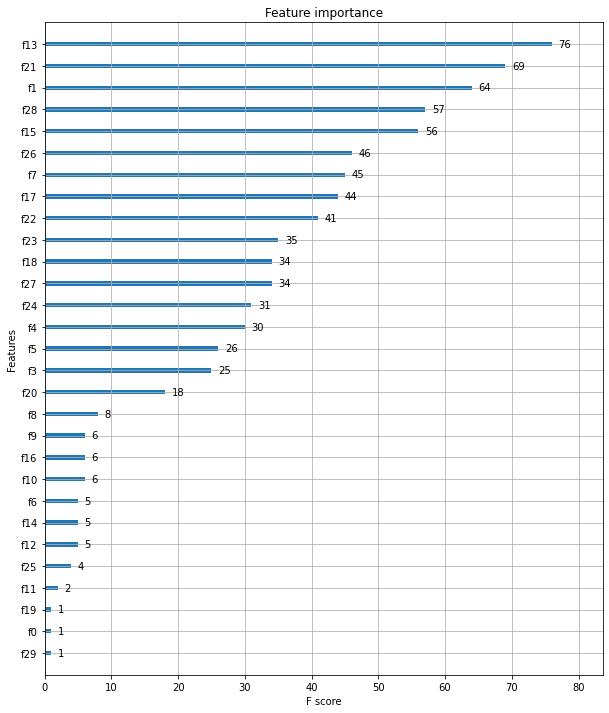

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 래퍼 XGBoost

사이킷런 프레임워크와 연동하기 위해 나온 전용 XGBoost 래퍼 클래스  

사이킷런의 유틸리티를 그대로 사용할 수 있기 때문에 기존의 다른 머신러닝 알고리즘으로 만든 프로그램이 있더라도  
알고리즘 클래스만 바꾸면 그대로 사용이 된다

사이킷런 래퍼런스 XGBoost는 분류를 위한 `XGBClassifier`, 회귀를 위한 `XGBRegressor`로 나뉜다

사이킷런 래퍼런스 XGBoost의 하이퍼 파라미터는 기존 XGBoost의 파라미터에서 몇가지가 변경되었다

- eta >> learning_rate  

- sub_sample >> subsample

- lambda >> reg_lambda

- alpha >> reg_alpha

![xgboost_params](https://user-images.githubusercontent.com/84296244/124789028-e1172680-df84-11eb-91b2-b693c3779e98.png)

## 사이킷런 래퍼 XGBoost 적용

In [22]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 불러오기
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [23]:
get_clf_eval(y_test , w_preds)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9665


In [24]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [25]:
get_clf_eval(y_test , ws100_preds)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9530


In [26]:

# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test , ws10_preds)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


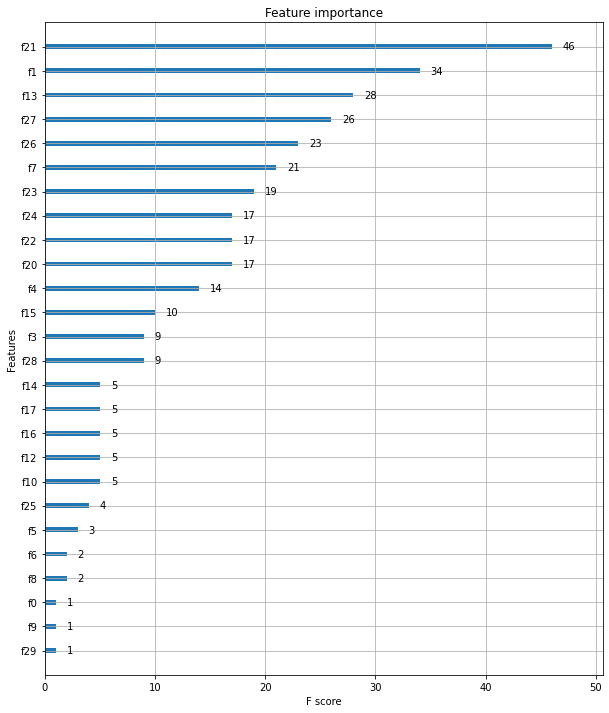

In [27]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

# LightGBM

## 개요

XGBoost와 함께 부스팅 계열 알고리즘의 쌍두마차  

XGBoost에 비해 학습 속도가 상향됐고 보다 적은 메모리를 사용한다  

그럼에도 예측의 성능은 별다른 차이가 없다

LightGBM은 일반적인 GBM 계열의 트리 분할 방법과 달리 리프 중심 트리 분할 방식을 사용한다

![xgboost_leafwise](https://user-images.githubusercontent.com/84296244/124788055-ffc8ed80-df83-11eb-8209-ad9cdc3e670c.png)

## LightGBM 하이퍼 파라미터

LightGBM의 하이퍼 파라미터는 XGBoost와 많은 부분이 유사하다  

다만 LightGBM은 리프노드가 계속 분할되면서 트리의 깊이가 깊어지므로  
이러한 특성에 맞춘 하이퍼 파라미터 설정이 필요하다

- num_iterations [기본값 = 100]
  - 반복 수행하려는 트리의 개수를 지정
  - 크게 지정할수록 예측 성능이 높아질 수 있다
  - 단 너무 크게 지정하면 과적합으로 성능이 저하될 수 있다

- learning_rate [기본값 = 0.1]
  - xgboost의 그것과 동일하다

- max_depth [기본값 = -1]
  - 0보다 작은값을 지정하면 트리의 깊이에 제한이 없다

- min_data_in_leaf [기본값 = 20]
  - 결정트리의 min_sample_leaf와 동일한 파라미터

- num_leaves [기본값 = 31]
  - 하나의 트리가 가질 수 있는 최대 리프 개수

- boosting [기본값 = gbdt]
  - gbdt : 일반적인 그라디언트 부스팅 결정 트리
  - rf : 랜덤 포레스트

- bagging_fraction [기본값 = 1.0]
  - 트리가 커져서 과적합되는것을 제어하기 위해 샘플링 비율을 지정

- feature_fraction [기본값 = 1.0]
  - 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율
  - 과적합을 막기위해 사용

- lambda_l2 [기본값 = 0.0]
  - L2 regulation 제어를 위한 값
  - 피처 개수가 많을 경우 적용을 검토하여 값이 클수록 과적합 감소효과가 있다

- lambda_l1 [기본값 = 0.0]
  - L1 regulation 제어를 위한 값
  - L2와 마찬가지로 과적합 제어가 목적


## 하이퍼 파라미터 튜닝 방안

num_leaves의 개수를 중심으로 min_child_samples (min_data_in_leaf), max_depth를 함께 조정하면서  
모델의 복잡도를 줄이는 것이 기본 튜닝 방안

## 사이킷런 래퍼 LightGBM

XGBoost 와 마찬가지로 사이킷런의 기능을 함께 사용하기 위해 나온 전용 래퍼 클래스  

비슷하게 분류를 위한 `LGBMClassifier` 과 회귀를 위한 `LGBMRegressor` 로 나눠진다  

하이퍼 파라미터 또한 몇가지가 변경되었다  

- num_iterations >> n_estimators

- min_data_in_leaf >> min_child_samples

- bagging_faction >> subsample

- feature_fraction >> colsample_bytree

- lambda_l2 >> reg_lambda

- lambda_l1 >> reg_alpha

![lightgbm_params](https://user-images.githubusercontent.com/84296244/124789043-e3798080-df84-11eb-8814-c88025dffcdb.png)

## LightGBM 위스콘신 유방암 예측

In [28]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.565079	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.507451	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355846	valid_0's binary_logloss: 0.355846
[7]	valid_0's binary_logloss: 0.330897	valid_0's binary_logloss: 0.330897
[8]	valid_0's binary_logloss: 0.306923	valid_0's binary_logloss: 0.306923
[9]	valid_0's binary_logloss: 0.28776	valid_0's binary_logloss: 0.28776
[10]	valid_0's binary_logloss: 0.26917	valid_0's binary_logloss: 0.26917
[11]	valid_0's binary_logloss: 0.250954	valid_0's binary_logloss: 0.250954
[12]	valid_0's binary_logloss: 0.23847	valid_0's binary_logloss: 0.23847
[13]	valid_0's binary_logloss: 0.225865	valid_0's bi

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [30]:
get_clf_eval(y_test, preds)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740,    F1: 0.9615, AUC:0.9330


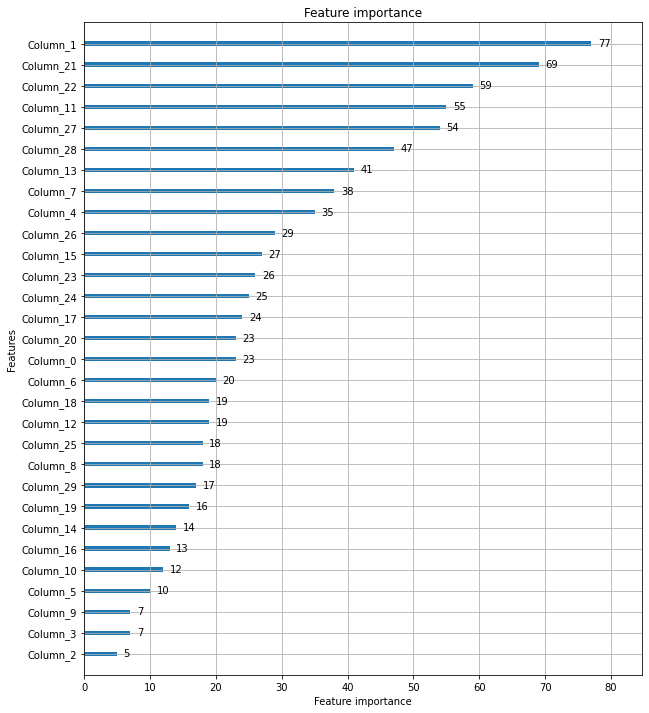

In [32]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

# XGBoost VS LightGBM

진짜로 XGBoot 보다 LightGBM이 뛰어난 알고리즘일까  

간단하게 한번 비교해보면 좋을듯하다

클래스 레이블 명은 `TARGET` 이고 1이면 불만, 0이면 만족한 고객을 의미한다  

평가 메트릭은 ROC-AUC로 하였다 

**ROC 곡선과 AUC 점수**  
이진 분류 모델 성능 측정에서 중요하게 사용되는 지표  

- 점수기준
  - 1.0 ~ 0.9 : 아주 좋음
  - 0.9 ~ 0,8 : 좋음
  - 0.8 ~ 0.7 : 괜찮은 모델
  - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
  - 0.6 이하 : 굉장히 좋지않은 모델

### 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time
# sklearn 관련
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# xgboost 관련
from xgboost import XGBClassifier
from xgboost import plot_importance
# lightgbm 관련
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

### 데이터 살펴보기

In [4]:
cust_df = pd.read_csv('./train.csv',encoding='latin-1')
print(cust_df.shape)
cust_df.head(3)

(76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.0,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


### 데이터 전처리

In [5]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,7.602000e+04,76020.000000,76020.0,76020.000000,76020.000000,7.602000e+04,7.602000e+04,7.602000e+04,7.602000e+04,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,68.803937,113.056934,68.205140,113.225058,137.242763,68.618087,113.792410,140.403479,5.477676,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522,0.045462,0.052249,0.042936,0.041476,0.010168,0.009997,0.000026,0.000026,0.050855,...,1077.256756,1048.856447,68.275452,9.505287,124.620962,110.026575,3.997023e+03,613.534443,5.703008e+03,4.401002e+03,3639.419939,556.184178,4852.261814,3857.848542,771.227449,162.170439,9.569502e+02,7.509563e+02,0.175324,0.0,0.513023,0.344174,9.117181e+01,3.646318e+01,1.310316e+02,1.092169e+02,0.213071,0.001910,0.253907,0.186630,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,319.605516,512.154823,531.897917,950.086398,697.712596,535.473750,953.578624,712.767240,465.391149,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925,0.208316,0.222531,0.202714,0.199390,0.100325,0.099486,0.005129,0.005129,0.219703,...,9614.906985,8189.948852,1733.838226,519.389157,2205.249804,1935.305713,3.777314e+04,9292.752726,4.620254e+04,3.550718e+04,26359.174223,7182

In [6]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID',axis=1, inplace=True)

### x 와 y 나누기

In [7]:
X = cust_df.iloc[:,:-1]
y = cust_df.iloc[:,-1]

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(y_train.value_counts()/y_train.count())
print(y_eval.value_counts()/y_eval.count())

0    0.960964
1    0.039036
Name: TARGET, dtype: float64
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습 & 하이퍼 파라미터 튜닝

In [8]:
tic = time.time() #시작 시간
#---------------------
# 학습
xgb = XGBClassifier(n_estimators = 500, random_state = 156)
xgb.fit(X_train, y_train, early_stopping_rounds = 100,
       eval_metric = "auc", eval_set = [(X_train, y_train), (X_eval, y_eval)])
xgb_roc_score = roc_auc_score(y_eval, xgb.predict_proba(X_eval)[:,1],average = 'macro')
#---------------------
toc = time.time() # 끝 시간

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8419
print('time elapsed:', toc - tic) #144초

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

In [9]:
tic = time.time()

#-------------------
# Grid Search
xgb = XGBClassifier(n_estimators = 100, random_state = 156)

# 하이퍼파라미터 후보
params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}
# folds = 3
gridcv = GridSearchCV(xgb, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_eval, y_eval)])
xgb_roc_score = roc_auc_score(y_eval, gridcv.predict_proba(X_eval)[:,1],
    average='macro')
#-------------------

toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) 
#{'colsample_bytree': 0.75, 'max_depth': 5, 'min_child_weight': 3}
print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) #0.8451
print('time elapsed:', toc - tic) # 932초

[0]	validation_0-auc:0.808554	validation_1-auc:0.808312
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813657	validation_1-auc:0.813928
[2]	validation_0-auc:0.803792	validation_1-auc:0.811241
[3]	validation_0-auc:0.818094	validation_1-auc:0.819595
[4]	validation_0-auc:0.822706	validation_1-auc:0.824675
[5]	validation_0-auc:0.811541	validation_1-auc:0.815635
[6]	validation_0-auc:0.824344	validation_1-auc:0.823535
[7]	validation_0-auc:0.829825	validation_1-auc:0.827602
[8]	validation_0-auc:0.834345	validation_1-auc:0.831343
[9]	validation_0-auc:0.835108	validation_1-auc:0.831486
[10]	validation_0-auc:0.833181	validation_1-auc:0.830521
[11]	validation_0-auc:0.831342	validation_1-auc:0.829627
[12]	validation_0-auc:0.826319	validation_1-auc:0.825715
[13]	validation_0-auc:0.8319	validation_1-auc:0.829615
[14]	validation_0-auc:0.834867	validation_1-auc:0.831223


최적의 파라미터를 적용해 다시 최적화 진행

In [10]:
tic = time.time()

xgb = XGBClassifier(
    colsample_bytree = 0.75, max_depth = 5, min_child_weight = 3
    , n_estimators = 1000,random_state = 156
    , learning_rate = 0.02, reg_alpha = 0.03
) # 위의 최적 파라미터 결과

xgb.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = "auc",
       eval_set = [(X_train, y_train), (X_eval, y_eval)])

xgb_roc_score = roc_auc_score(y_eval, xgb.predict_proba(X_eval)[:,1]
    ,average='macro')

toc = time.time()

print('ROC AUC: {0:.4f}'.format(xgb_roc_score)) # 0.8447
print('time elapsed:', toc - tic) # 249초

[0]	validation_0-auc:0.817376	validation_1-auc:0.812993
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.819701	validation_1-auc:0.813427
[2]	validation_0-auc:0.823292	validation_1-auc:0.818083
[3]	validation_0-auc:0.825727	validation_1-auc:0.82164
[4]	validation_0-auc:0.826559	validation_1-auc:0.821895
[5]	validation_0-auc:0.827502	validation_1-auc:0.822734
[6]	validation_0-auc:0.828254	validation_1-auc:0.822475
[7]	validation_0-auc:0.828359	validation_1-auc:0.821626
[8]	validation_0-auc:0.829395	validation_1-auc:0.822245
[9]	validation_0-auc:0.829697	validation_1-auc:0.821881
[10]	validation_0-auc:0.831148	validation_1-auc:0.823734
[11]	validation_0-auc:0.829414	validation_1-auc:0.822521
[12]	validation_0-auc:0.829867	validation_1-auc:0.822372
[13]	validation_0-auc:0.831643	validation_1-auc:0.823594
[14]	validation_0-auc:0.835308	validation_1-auc:0.82972

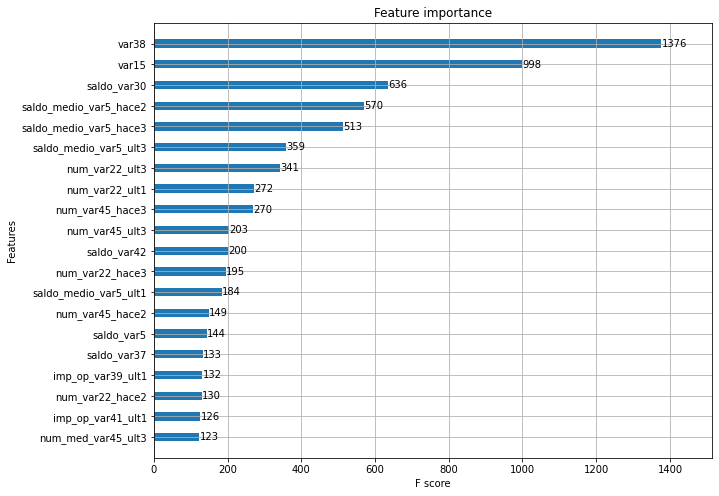

In [11]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(10,8))
plot_importance(xgb, ax=ax, max_num_features = 20, height=.4)


### LightGBM 모델 학습 & 하이퍼 파라미터 튜닝

In [12]:
tic = time.time()
lgbm = LGBMClassifier (n_estimators = 500, random_state = 156)

lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", 
         eval_set = [(X_train, y_train), (X_eval, y_eval)])

lgbm_roc_score = roc_auc_score (y_eval, lgbm.predict_proba(X_eval)[:,1], average="macro")
toc = time.time()


print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) # 0.8396
print('time elapsed:', toc - tic) # 6.8초!

[1]	training's binary_logloss: 0.156016	training's auc: 0.823612	valid_1's binary_logloss: 0.165046	valid_1's auc: 0.817384
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.150537	training's auc: 0.827721	valid_1's binary_logloss: 0.16	valid_1's auc: 0.81863
[3]	training's binary_logloss: 0.146582	training's auc: 0.838174	valid_1's binary_logloss: 0.156287	valid_1's auc: 0.827411
[4]	training's binary_logloss: 0.143436	training's auc: 0.843175	valid_1's binary_logloss: 0.153416	valid_1's auc: 0.832175
[5]	training's binary_logloss: 0.14091	training's auc: 0.845936	valid_1's binary_logloss: 0.151206	valid_1's auc: 0.83481
[6]	training's binary_logloss: 0.138833	training's auc: 0.847111	valid_1's binary_logloss: 0.149303	valid_1's auc: 0.834721
[7]	training's binary_logloss: 0.137055	training's auc: 0.850065	valid_1's binary_logloss: 0.147804	valid_1's auc: 0.83659
[8]	training's binary_logloss: 0.135438	training's auc: 0.852458	valid_1's bi

In [13]:
tic = time.time()

params = {
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}
lgbm = LGBMClassifier(n_estimator = 100)

gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_eval, y_eval)])

lgbm_roc_score = roc_auc_score(y_eval, gridcv.predict_proba(X_eval)[:,1],average='macro')

toc = time.time()

print('Optimized hyperparameters', gridcv.best_params_) # {'max_depth': 128, 'min_child_samples': 60, 'subsample': 0.8}
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) # 0.8416
print('time elapsed:', toc - tic) # 94초

[1]	valid_0's binary_logloss: 0.156116	valid_0's auc: 0.820107	valid_1's binary_logloss: 0.165023	valid_1's auc: 0.815632
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.151001	valid_0's auc: 0.825543	valid_1's binary_logloss: 0.159945	valid_1's auc: 0.821373
[3]	valid_0's binary_logloss: 0.147225	valid_0's auc: 0.832031	valid_1's binary_logloss: 0.156449	valid_1's auc: 0.827139
[4]	valid_0's binary_logloss: 0.144199	valid_0's auc: 0.83757	valid_1's binary_logloss: 0.153342	valid_1's auc: 0.83326
[5]	valid_0's binary_logloss: 0.14177	valid_0's auc: 0.840565	valid_1's binary_logloss: 0.151004	valid_1's auc: 0.835976
[6]	valid_0's binary_logloss: 0.139764	valid_0's auc: 0.843203	valid_1's binary_logloss: 0.149049	valid_1's auc: 0.837154
[7]	valid_0's binary_logloss: 0.138127	valid_0's auc: 0.844851	valid_1's binary_logloss: 0.147468	valid_1's auc: 0.837653
[8]	valid_0's binary_logloss: 0.136741	valid_0's auc: 0.847018	valid_1's binary_logloss

In [14]:
tic = time.time()

lgbm = LGBMClassifier(n_estimators = 1000, max_depth = 128, min_child_samples = 60, subsample = 0.8, random_state = 156)
lgbm.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = "auc", eval_set = [(X_train, y_train), (X_eval, y_eval)])
lgbm_roc_score = roc_auc_score(y_eval, lgbm.predict_proba(X_eval)[:,1],average='macro')

toc = time.time()

print('ROC AUC: {0:.4f}'.format(lgbm_roc_score)) # 0.8416 
print('time elapsed:', toc - tic) # 6.8

[1]	training's binary_logloss: 0.156167	training's auc: 0.823544	valid_1's binary_logloss: 0.165164	valid_1's auc: 0.81662
Training until validation scores don't improve for 100 rounds.
[2]	training's binary_logloss: 0.150935	training's auc: 0.827956	valid_1's binary_logloss: 0.160021	valid_1's auc: 0.819528
[3]	training's binary_logloss: 0.147083	training's auc: 0.837524	valid_1's binary_logloss: 0.156461	valid_1's auc: 0.827239
[4]	training's binary_logloss: 0.144061	training's auc: 0.843209	valid_1's binary_logloss: 0.153544	valid_1's auc: 0.833228
[5]	training's binary_logloss: 0.141642	training's auc: 0.845338	valid_1's binary_logloss: 0.151228	valid_1's auc: 0.835456
[6]	training's binary_logloss: 0.139662	training's auc: 0.847829	valid_1's binary_logloss: 0.149337	valid_1's auc: 0.837447
[7]	training's binary_logloss: 0.137933	training's auc: 0.850996	valid_1's binary_logloss: 0.147795	valid_1's auc: 0.838477
[8]	training's binary_logloss: 0.136423	training's auc: 0.852586	valid